In [1]:
!pip install kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

     |████████████████████████████████| 1.5MB 19.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 4.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=d6aba9c5e913d4575d65c66ba3ec6d3360e47757f6e232cc1d73a396c0355f79
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
!kaggle competitions download -c sejong-ai-challenge-p3

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 11.8MB/s]


In [3]:
!unzip sejong-ai-challenge-p3.zip

Archive:  sejong-ai-challenge-p3.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
pip install h2o

     |████████████████████████████████| 164.8 MB 51 kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=b28a76160b2ac822a89f27346ff3efd5120e48be278cd50d6a59205c587a3bfc
  Stored in directory: /root/.cache/pip/wheels/85/cb/f5/a72d41b4676331c29bbc5bb881bc2ac2fea8a10a4960f3488d
Successfully built h2o


In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [2]:
print(train.shape)
print(test.shape)
print(submit.shape)
train.head(10)

(647, 20)
(100, 19)
(100, 2)


,id,y,bw,b.head,preterm,birth.o,nnhealth,momage,dadage,sex,twin,b.marr,mom.edu,cig,first,booze,drugs,work.dur,site,prenatal
0,1,5.778438,1559,28.648521,10,2,94,33,NaN,1,0,1,NaN,0,1,0,1,1,0.0,1
1,3,4.085857,1000,25.000000,8,4,89,33,NaN,0,0,0,0.0,1,1,1,1,1,0.0,1
2,4,5.615404,1430,29.000000,6,1,112,22,31.0,0,0,0,0.0,0,2,0,1,0,0.0,1
3,5,2.116421,1984,31.000000,2,1,99,20,NaN,0,0,0,2.0,1,2,0,1,0,0.0,1
4,6,5.464959,1320,28.000000,7,2,110,23,NaN,1,0,0,2.0,1,1,0,1,1,0.0,1
5,8,3.486334,2020,29.000000,5,2,100,37,NaN,1,0,0,0.0,1,1,0,1,1,0.0,1
6,10,2.890401,2041,31.000000,9,3,98,41,NaN,1,0,1,0.0,0,1,0,1,1,0.0,1
7,11,5.922454,1320,26.162501,10,1,110,27,NaN,1,0,1,NaN,0,2,0,1,1,0.0,1
8,12,4.163037,2150,32.000000,7,3,87,30,NaN,1,0,1,0.0,0,1,0,1,1,0.0,1
9,13,6.000017,1620,28.000000,8,2,109,22,NaN,0,0,0,0.0,0,1,0,1,1,0.0,1


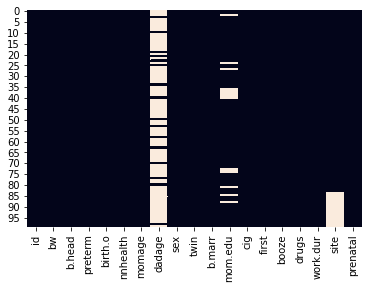

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.heatmap(train.isnull(), cbar=False)
sns.heatmap(test.isnull(), cbar=False)

In [4]:
train = train.drop(['dadage'], 1)
test = test.drop(['dadage'], 1)

In [5]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [6]:
train.head(10)

,id,y,bw,b.head,preterm,birth.o,nnhealth,momage,sex,twin,b.marr,mom.edu,cig,first,booze,drugs,work.dur,site,prenatal
0,1,5.778438,1559,28.648521,10,2,94,33,1,0,1,0.832727,0,1,0,1,1,0.0,1
1,3,4.085857,1000,25.000000,8,4,89,33,0,0,0,0.000000,1,1,1,1,1,0.0,1
2,4,5.615404,1430,29.000000,6,1,112,22,0,0,0,0.000000,0,2,0,1,0,0.0,1
3,5,2.116421,1984,31.000000,2,1,99,20,0,0,0,2.000000,1,2,0,1,0,0.0,1
4,6,5.464959,1320,28.000000,7,2,110,23,1,0,0,2.000000,1,1,0,1,1,0.0,1
5,8,3.486334,2020,29.000000,5,2,100,37,1,0,0,0.000000,1,1,0,1,1,0.0,1
6,10,2.890401,2041,31.000000,9,3,98,41,1,0,1,0.000000,0,1,0,1,1,0.0,1
7,11,5.922454,1320,26.162501,10,1,110,27,1,0,1,0.832727,0,2,0,1,1,0.0,1
8,12,4.163037,2150,32.000000,7,3,87,30,1,0,1,0.000000,0,1,0,1,1,0.0,1
9,13,6.000017,1620,28.000000,8,2,109,22,0,0,0,0.000000,0,1,0,1,1,0.0,1


In [7]:
x_train = train.drop(['y'], 1)
y_train = train['y']

x_train

,id,bw,b.head,preterm,birth.o,nnhealth,momage,sex,twin,b.marr,mom.edu,cig,first,booze,drugs,work.dur,site,prenatal
0,1,1559,28.648521,10,2,94,33,1,0,1,0.832727,0,1,0,1,1,0.000000,1
1,3,1000,25.000000,8,4,89,33,0,0,0,0.000000,1,1,1,1,1,0.000000,1
2,4,1430,29.000000,6,1,112,22,0,0,0,0.000000,0,2,0,1,0,0.000000,1
3,5,1984,31.000000,2,1,99,20,0,0,0,2.000000,1,2,0,1,0,0.000000,1
4,6,1320,28.000000,7,2,110,23,1,0,0,2.000000,1,1,0,1,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,980,1800,29.000000,6,2,94,36,0,0,1,2.000000,1,1,0,1,0,2.959292,1
643,981,2140,29.000000,5,1,112,32,0,0,1,0.832727,0,2,1,1,1,2.959292,1
644,982,2350,30.000000,3,2,111,28,0,0,0,1.000000,0,1,0,1,1,2.959292,1
645,983,1670,29.000000,3,1,125,28,1,0,1,0.832727,0,2,0,1,1,2.959292,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
test = scaler.fit_transform(test)

In [9]:
x_train

array([[0.        , 0.49408602, 0.54053258, ..., 1.        , 0.        ,
        1.        ],
       [0.00203459, 0.19354839, 0.3125    , ..., 1.        , 0.        ,
        1.        ],
       [0.00305188, 0.42473118, 0.5625    , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99796541, 0.91935484, 0.625     , ..., 1.        , 0.49321534,
        1.        ],
       [0.99898271, 0.55376344, 0.5625    , ..., 1.        , 0.49321534,
        1.        ],
       [1.        , 0.59139785, 0.6875    , ..., 1.        , 0.49321534,
        1.        ]])

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.15)

In [11]:
x_train.shape

(549, 18)

자동화 관련

https://dbrang.tistory.com/1533

In [12]:
pip install auto-sklearn

In [13]:
#auto - sklearn

from autosklearn.regression import AutoSklearnRegressor
from sklearn.metrics import mean_squared_error

re = AutoSklearnRegressor(
    time_left_for_this_task  = 300,
    per_run_time_limit = 30,
)
re.fit(x_train, y_train)
y_val_pred = re.predict(x_val)

print('mean_sqared_score: ', mean_squared_error(y_val, y_val_pred))

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


mean_sqared_score:  2.287213504555078


In [14]:
test.shape

(100, 18)

In [15]:
y_pred = re.predict(test)

for i in range(len(y_pred)):
    submit['y'][i] = y_pred[i]

submit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,y
0,17,4.711113
1,28,2.187376
2,58,3.622550
3,62,3.113129
4,64,2.440923
...,...,...
95,937,2.074040
96,942,3.015543
97,952,4.933465
98,958,5.228149


In [16]:
submit.to_csv('submit.csv', index = None, header = True)

!kaggle competitions submit -c sejong-ai-challenge-p3 -f submit.csv -m "Message"

100% 2.18k/2.18k [00:00<00:00, 4.64kB/s]
Successfully submitted to Sejong AI Challenge 문제3